# Graph coloring problem
Given an undirected graph and a set of colors, color the graph so that adjacent nodes are different colors

In [1]:
# import necessary packages
import time
import numpy as np
import numpy.random as random

import dimod
import networkx as nx

from dwave.system import DWaveSampler, AutoEmbeddingComposite

# only for QUBO/classical solver
import pyqubo
from pyqubo import Binary, Constraint

import dwave.inspector

## Generate graph

34


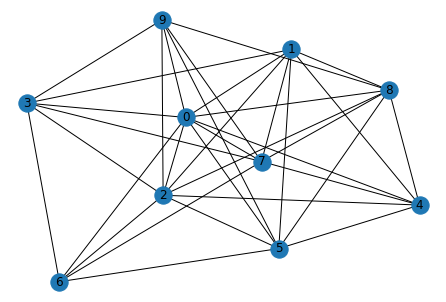

In [22]:
# number of colors
num_colors = 10

# generate random graph
# number of nodes
num_nodes = 10
# edge generation probability
p = 0.75
# seed (optional)
seed = 45
#generate graph
graph = nx.gnp_random_graph(num_nodes,p,seed)

# draw graph
nx.draw(graph, with_labels=True)

print(len(graph.edges))

# graph = nx.Graph()
# graph.add_nodes_from([0,4])
# graph.add_edges_from([(0,1),(0,4),(1,2),(1,3),(1,4),(2,3),(3,4)])

# # graph.nodes.sort()
# print(type(graph.nodes))

# # house positions
# pos = {0: (0.5, 2.0), 1: (1, 1), 2: (1, 0), 3: (0, 0),  4: (0, 1)}

# nx.draw(graph, pos=pos, with_labels=True)

## Build BQM

In [23]:
# define variables
colors = [[Binary(f'({n}, {c})') for c in range(num_colors)] for n in graph.nodes]

P = 4
H = 0
# color one hot
for n in graph.nodes:
    H += P*Constraint((sum(colors[n][c] for c in range(num_colors))-1)**2, label=f'one hot{n}')

# adjacent nodes
for i,j in graph.edges:
    H += P*Constraint(sum(colors[i][p]*colors[j][p] for p in range(num_colors)), label=f'adjacent {i},{j}')

model = H.compile()
Q = model.to_bqm()
print(Q.to_polystring())

40 - 4*(5, 3) - 4*(5, 5) - 4*(6, 2) - 4*(7, 2) - 4*(3, 2) - 4*(1, 2) - 4*(1, 4) - 4*(0, 4) - 4*(5, 4) - 4*(2, 1) - 4*(8, 1) - 4*(2, 4) - 4*(2, 8) - 4*(4, 5) - 4*(4, 8) - 4*(7, 4) - 4*(2, 0) - 4*(2, 5) - 4*(7, 0) - 4*(7, 6) - 4*(4, 0) - 4*(5, 2) - 4*(5, 7) - 4*(1, 6) - 4*(1, 9) - 4*(0, 7) - 4*(8, 2) - 4*(8, 5) - 4*(3, 4) - 4*(3, 6) - 4*(6, 1) - 4*(7, 1) - 4*(6, 6) - 4*(1, 0) - 4*(1, 3) - 4*(9, 0) - 4*(9, 9) - 4*(9, 4) - 4*(9, 8) - 4*(4, 1) - 4*(0, 3) - 4*(4, 3) - 4*(1, 8) - 4*(0, 8) - 4*(9, 7) - 4*(8, 0) - 4*(8, 9) - 4*(2, 6) - 4*(0, 9) - 4*(0, 0) - 4*(0, 6) - 4*(2, 7) - 4*(6, 4) - 4*(6, 9) - 4*(9, 6) - 4*(5, 1) - 4*(5, 8) - 4*(9, 1) - 4*(9, 3) - 4*(7, 9) - 4*(8, 7) - 4*(0, 2) - 4*(9, 2) - 4*(0, 1) - 4*(8, 3) - 4*(4, 6) - 4*(3, 3) - 4*(3, 7) - 4*(3, 8) - 4*(4, 4) - 4*(7, 3) - 4*(5, 6) - 4*(8, 6) - 4*(1, 5) - 4*(1, 1) - 4*(2, 9) - 4*(3, 0) - 4*(3, 9) - 4*(8, 4) - 4*(6, 5) - 4*(3, 1) - 4*(2, 2) - 4*(3, 5) - 4*(4, 2) - 4*(4, 7) - 4*(1, 7) - 4*(6, 0) - 4*(6, 8) - 4*(5, 0) - 4*(0, 5) - 4*(2,

## Solve

In [24]:
start = time.time()
# run QPU solver
sampler = AutoEmbeddingComposite(DWaveSampler())
response = sampler.sample(Q, num_reads=1000, label='BQM Graph Coloring')
elapsed = time.time() - start
print("Solved in %.2f seconds" % elapsed)
print(response.first.sample, response.first.energy)

Solved in 22.47 seconds
{'(0, 0)': 0, '(0, 1)': 0, '(0, 2)': 0, '(0, 3)': 0, '(0, 4)': 1, '(0, 5)': 0, '(0, 6)': 0, '(0, 7)': 0, '(0, 8)': 0, '(0, 9)': 0, '(1, 0)': 0, '(1, 1)': 0, '(1, 2)': 0, '(1, 3)': 0, '(1, 4)': 0, '(1, 5)': 0, '(1, 6)': 0, '(1, 7)': 1, '(1, 8)': 0, '(1, 9)': 0, '(2, 0)': 1, '(2, 1)': 0, '(2, 2)': 0, '(2, 3)': 0, '(2, 4)': 0, '(2, 5)': 0, '(2, 6)': 0, '(2, 7)': 0, '(2, 8)': 0, '(2, 9)': 0, '(3, 0)': 0, '(3, 1)': 0, '(3, 2)': 0, '(3, 3)': 0, '(3, 4)': 0, '(3, 5)': 0, '(3, 6)': 0, '(3, 7)': 0, '(3, 8)': 1, '(3, 9)': 0, '(4, 0)': 0, '(4, 1)': 0, '(4, 2)': 0, '(4, 3)': 0, '(4, 4)': 0, '(4, 5)': 0, '(4, 6)': 0, '(4, 7)': 0, '(4, 8)': 0, '(4, 9)': 1, '(5, 0)': 0, '(5, 1)': 0, '(5, 2)': 0, '(5, 3)': 0, '(5, 4)': 0, '(5, 5)': 0, '(5, 6)': 1, '(5, 7)': 0, '(5, 8)': 0, '(5, 9)': 0, '(6, 0)': 0, '(6, 1)': 0, '(6, 2)': 1, '(6, 3)': 0, '(6, 4)': 0, '(6, 5)': 0, '(6, 6)': 0, '(6, 7)': 0, '(6, 8)': 0, '(6, 9)': 0, '(7, 0)': 1, '(7, 1)': 0, '(7, 2)': 0, '(7, 3)': 0, '(7, 4)': 0, 

## Redraw graph solution

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
['cyan' 'purple' 'red' 'olive' 'grey' 'yellow' 'green' 'red' 'green'
 'grey']


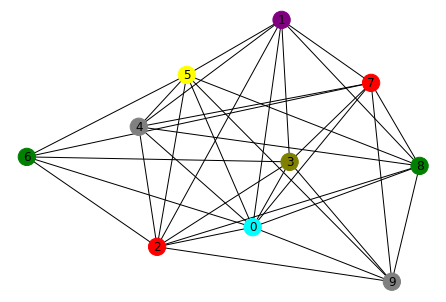

In [25]:
gcolors = ['red', 'blue', 'green', 'black', 'cyan', 'orange', 'yellow', 'purple', 'olive', 'grey']
color_map = np.empty(len(graph.nodes), dtype=object)

sorted_nodes = np.array(sorted(graph.nodes))

for n in graph.nodes:
    for c in range(num_colors):
        i = f'({n}, {c})'
        if response.first.sample[i] > 0.5:
            color_map[n] = gcolors[c]
        if color_map[n] is None:
            color_map[n] = "white"

print(graph.nodes)
print(color_map)
        
# draw graph
nx.draw(graph, node_color=color_map, with_labels=True)

In [26]:
dec = model.decode_sample(response.first.sample, vartype='BINARY')
print(dec.constraints(only_broken=True))
print(len(dec.constraints(only_broken=True)))

{}
0


In [27]:
dwave.inspector.show(response)

'http://127.0.0.1:18000/?problemId=e9064599-ae04-4c9a-8987-131ea09a9cb3'